<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

https://www.kaggle.com/code/drindeng/an-ad-a-b-testing-with-z-test

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import binom
from scipy.stats import norm
import seaborn as sns


In [3]:
df=pd.read_csv("AdSmartABdata - AdSmartABdata.csv")
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [7]:
df_NoAns = df[(df['yes'] == 0) & (df['no'] == 0)]

df_AfterNoAns= df.drop(df_NoAns.index)

df_AfterNoAns['experiment'].value_counts()
Num_con= df_AfterNoAns.experiment.value_counts().control
Num_exp= df_AfterNoAns.experiment.value_counts().exposed
Exper= df_AfterNoAns.groupby(['experiment']).sum()
Exper_YesNo= df_AfterNoAns.groupby('experiment')['yes','no'].sum()
Exper_Yes= df_AfterNoAns.groupby('experiment')['yes'].sum()

Con_Yes=Exper_Yes.iloc[0]
Exp_Yes=Exper_Yes.iloc[1]

rate_con, rate_exp = Con_Yes/Num_con, Exp_Yes/Num_exp

/tmp/ipykernel_35085/2207904088.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Exper_YesNo= df_AfterNoAns.groupby('experiment')['yes','no'].sum()


In [8]:
# Statistical Significance

# Significance Level
alpha = 0.05

p_pooled_hat= (Con_Yes+Exp_Yes)/(Num_con+Num_exp)
p_pooled_hat

0.46017699115044247

In [9]:
pooled_variance= p_pooled_hat*(1-p_pooled_hat) * (1/Num_con + 1/Num_exp)
pooled_variance

0.0008020185896747209

In [10]:
# Standard Error
SE = np.sqrt(pooled_variance)
SE

0.028319932727228023

In [13]:
# test statsitics
Test_stat = (rate_con - rate_exp)/SE
Test_stat

-0.645680181221037

In [14]:
# critical value usig the standard normal distribution
Z_crit = norm.ppf(1-alpha/2)
Z_crit


1.959963984540054

In [15]:
# Margin of error
m = SE * Z_crit
m

0.055506048189964116

In [19]:
# two sided test and using symmetry property of Normal distibution so we multiple with 2
z_score = norm.sf(Test_stat)*2
z_score

# Confidence Interval
CI = [(rate_con-rate_exp) - SE * Z_crit, (rate_con-rate_exp) + SE * Z_crit]
CI

if np.abs(Test_stat) >= Z_crit:
    print("reject the null")
else:
    print('Z-score = ',z_score)
    print('Therefore, we cannot reject the null')
    

Z-score =  1.4815135017801033
Can not reject the null


In [21]:
print("Test Statistics stat: ", Test_stat)
print("Z-critical: ", Z_crit)
print("z_score: ", z_score)
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,6))


Test Statistics stat:  -0.645680181221037
Z-critical:  1.959963984540054
z_score:  1.4815135017801033
Confidence Interval of 2 sample Z-test for proportions:  [-0.073792  0.03722 ]


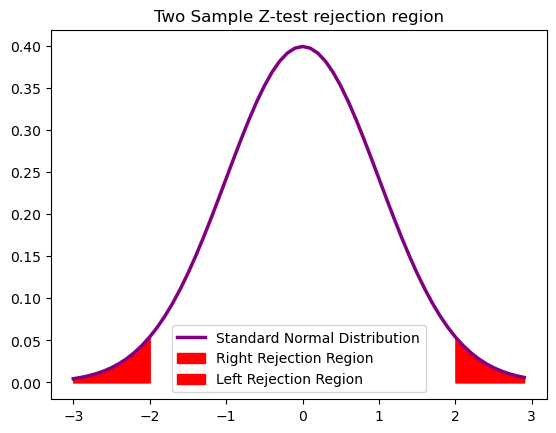

In [22]:
import matplotlib.pyplot as plt
z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), 
         label = 'Standard Normal Distribution',
         color = 'purple',
         linewidth = 2.5)

plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), 
                 label = 'Right Rejection Region',
                 color ='r' )
plt.fill_between(z[z<(-1)*Z_crit], 
                 norm.pdf(z[z<(-1)*Z_crit]), 
                 label = 'Left Rejection Region',
                 color ='r' )
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()